In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import yfinance as yf



In [ ]:
start = '2019-01-01'
end = '2023-12-31'

In [ ]:
test_start = '2024-01-01'
test_end = '2024-03-01'

In [ ]:
#give the number of days to forecast
forecast_days = 20

In [ ]:
ticker = 'SBIN.NS'

In [ ]:
# Load your historical data
# Replace 'your_data.csv' with your actual file name
data = yf.download(ticker, start = start, end = end)



[*********************100%***********************]  1 of 1 completed


In [ ]:
data.fillna(0, inplace=True)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1358
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0070
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0053
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0047
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0047
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0044
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0041
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0044
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0037
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


[*********************100%***********************]  1 of 1 completed


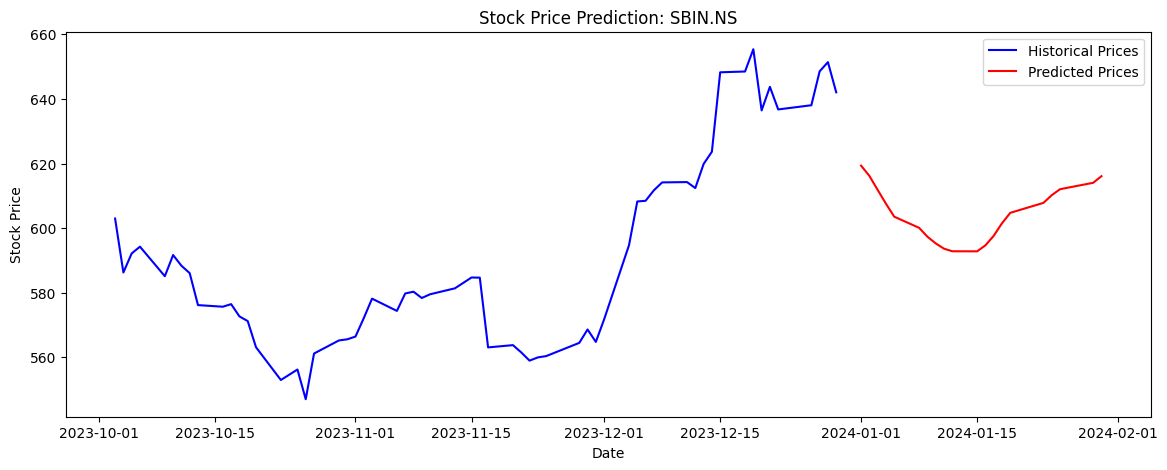

In [ ]:

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Create the training data
#train_data = scaled_data[:-forecast_days]  # Use all but the last 20 days for training
train_data = scaled_data
X_train, y_train = [], []
for i in range(60, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Create the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Predicting the next price

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions for the next 20 days
inputs = scaled_data[len(scaled_data) - len(data) - 60:].reshape(-1, 1)  # Prepare the input for the last 60 days
inputs = np.concatenate((inputs, scaled_data[-forecast_days:]))  # Add the last 20 days to the inputs

X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)  # Reverse the scaling

compare_data = yf.download(ticker, start = test_start, end = test_end)
comp_data = compare_data['Close'].iloc[:forecast_days]
predicted_dates = comp_data.index[:forecast_days]

# Plotting the results
plt.figure(figsize=(14, 5))
plt.plot(data.index[-60:], data['Close'].values[-60:], color='blue', label='Historical Prices')
#predicted_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_days)
#plt.plot(predicted_dates,comp_data, color = 'green', label = 'Actual Prices')
plt.plot(predicted_dates, predicted_prices, color='red', label='Predicted Prices')
plt.title(f'Stock Price Prediction: {ticker}')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.savefig(f'/content/drive/MyDrive/Ph.D/Datasets/LSTM/predictions/{ticker}.png', format='png', dpi=300)  # Adjust dpi for quality


In [ ]:
predicted_prices

array([[619.34894],
       [616.1694 ],
       [611.8281 ],
       [607.56055],
       [603.5312 ],
       [600.0824 ],
       [597.35144],
       [595.2628 ],
       [593.6299 ],
       [592.8235 ],
       [592.8007 ],
       [594.66534],
       [597.60675],
       [601.50244],
       [604.72876],
       [607.81384],
       [610.1874 ],
       [612.0468 ],
       [614.0286 ],
       [616.08594]], dtype=float32)

In [ ]:
# compare_data = yf.download(ticker, start = test_start, end = test_end)

In [ ]:
# comp_data = compare_data['Close'].iloc[:forecast_days]

In [ ]:
# predicted_dates = comp_data.index[:forecast_days]

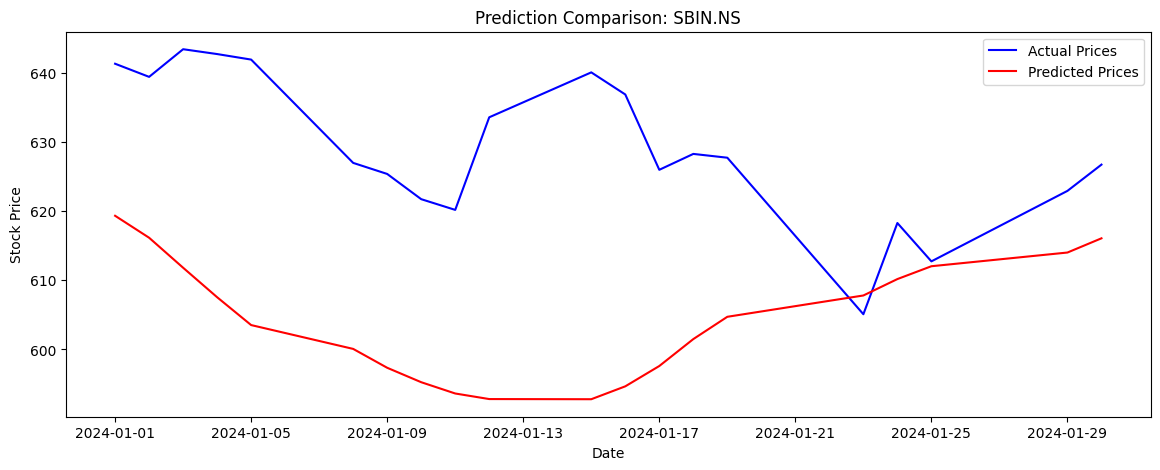

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(comp_data.index, comp_data, color='blue', label='Actual Prices')
# predicted_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=20)
# predicted_dates = pd.date_range(start=comp_data.index[0]+pd.Timedelta(days=1), periods=20)
# predicted_date = comp_data.index[:19]
plt.plot(predicted_dates, predicted_prices, color='red', label='Predicted Prices')
plt.title(f'Prediction Comparison: {ticker}')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.savefig(f'/content/drive/MyDrive/Ph.D/Datasets/LSTM/comparison/{ticker}.png', format='png', dpi=300)  # Adjust dpi for quality
plt.show()

In [ ]:
final_data = comp_data

In [ ]:
final_data = pd.DataFrame(final_data)

In [ ]:
final_data['Predicted'] = predicted_prices

In [ ]:
# prompt: change the name of 'Predicted" column in final_data to 'Forecast'

final_data = final_data.rename(columns={'Predicted': 'Forecast'})


In [ ]:
final_data['Returns'] = final_data['Forecast'].diff()

In [ ]:
final_data.iloc[0, final_data.columns.get_loc('Returns')] = final_data.iloc[0,final_data.columns.get_loc('Close')]

In [ ]:
# prompt: create a new column named 'Predicted' in final_data, which should contain the cumulative sum of 'Returns' column

final_data['Predicted'] = final_data['Returns'].cumsum()


In [ ]:
final_data

,Close,Forecast,Returns,Predicted
Date,,,,
2024-01-01,641.349976,619.348938,641.349976,641.349976
2024-01-02,639.450012,616.169373,-3.179565,638.170410
2024-01-03,643.450012,611.828125,-4.341248,633.829163
2024-01-04,642.750000,607.560547,-4.267578,629.561584
2024-01-05,641.950012,603.531189,-4.029358,625.532227
2024-01-08,627.000000,600.082397,-3.448792,622.083435
2024-01-09,625.400024,597.351440,-2.730957,619.352478
2024-01-10,621.750000,595.262817,-2.088623,617.263855
2024-01-11,620.200012,593.629883,-1.632935,615.630920


In [ ]:
final_data.to_csv(f'/content/drive/MyDrive/Ph.D/Datasets/LSTM/comparison/{ticker}.csv')